In [2]:
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [11]:
ocp_df = pd.read_csv('./Fixed OCP Search.csv')
conditional_operate_df = pd.read_csv('Condition Operate.csv')
operate_df = pd.read_csv('OCP Entitled to Operate.csv')

In [9]:
def clean_city(df, file_name):

    df['City'] = df['City'].str.replace("Bowmanville", "Clarington")
    df['City'] = df['City'].str.replace("Agincourt", "Scarborough")
    df['City'] = df['City'].str.replace("East York", "Toronto")
    df['City'] = df['City'].str.replace("North York", "Toronto")
    df['City'] = df['City'].str.replace('[^A-Za-z\s]+', '')
    df['City'] = df['City'].str.strip()


    df['City'].value_counts().to_csv(f'{file_name}.csv')

C:\Users\shann\AppData\Local\Temp\ipykernel_16612\2038156751.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  ocp_df['City'] = ocp_df['City'].str.replace('[^A-Za-z\s]+', '')


In [4]:
active_pharmacies = ocp_df[ocp_df['Status'] == 'Active']
active_pharmacies = active_pharmacies.assign(services=pd.NA, Fees=pd.NA)

active_pharmacies['Phone'] = active_pharmacies['Phone'].str.replace(r'+', '')
active_pharmacies['Phone'] = active_pharmacies['Phone'].str.replace(r'^1', '')
active_pharmacies['Phone'] = active_pharmacies['Phone'].str.replace(r'[-()]+', '')

active_pharmacies['Fax'] = active_pharmacies['Fax'].str.replace(r'+', '')
active_pharmacies['Fax'] = active_pharmacies['Fax'].str.replace(r'^1', '')
active_pharmacies['Fax'] = active_pharmacies['Fax'].str.replace(r'[-()]+', '')



active_count_city = active_pharmacies[['City', 'Accreditation_Number']].groupby('City').count().reset_index()

C:\Users\shann\AppData\Local\Temp\ipykernel_27724\35833960.py:4: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  active_pharmacies['Phone'] = active_pharmacies['Phone'].str.replace(r'+', '')
C:\Users\shann\AppData\Local\Temp\ipykernel_27724\35833960.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  active_pharmacies['Phone'] = active_pharmacies['Phone'].str.replace(r'^1', '')
C:\Users\shann\AppData\Local\Temp\ipykernel_27724\35833960.py:6: FutureWarning: The default value of regex will change from True to False in a future version.
  active_pharmacies['Phone'] = active_pharmacies['Phone'].str.replace(r'[-()]+', '')
C:\Users\shann\AppData\Local\Temp\ipykernel_27724\35833960.py:8: FutureWarning: The default value of regex will change from True to False in a future version. In additio

,City,Accreditation_Number
0,Acton,6
1,Ailsa Craig,1
2,Ajax,31
3,Akwesasne,1
4,Alban,1
...,...,...
522,Woodstock,1
523,Woodville,1
524,Wyoming,1
525,York,26


In [8]:
active_count_city[active_count_city['City'] == 'Burlington']

,City,Accreditation_Number
71,Burlington,81


Lets do some EDA.
I want to learn how many pharmacies are there in Guelph, Vaughan, Toronto, Scarborough, Kingston, Uxbridge and Kitchner?
Also what is the average number of pharmacies per city?

In [5]:
print(active_count_city['Accreditation_Number'].median())
print(active_count_city['Accreditation_Number'].mean())
print(active_count_city['Accreditation_Number'].mode())


2.0
9.776091081593927
0    1
Name: Accreditation_Number, dtype: int64


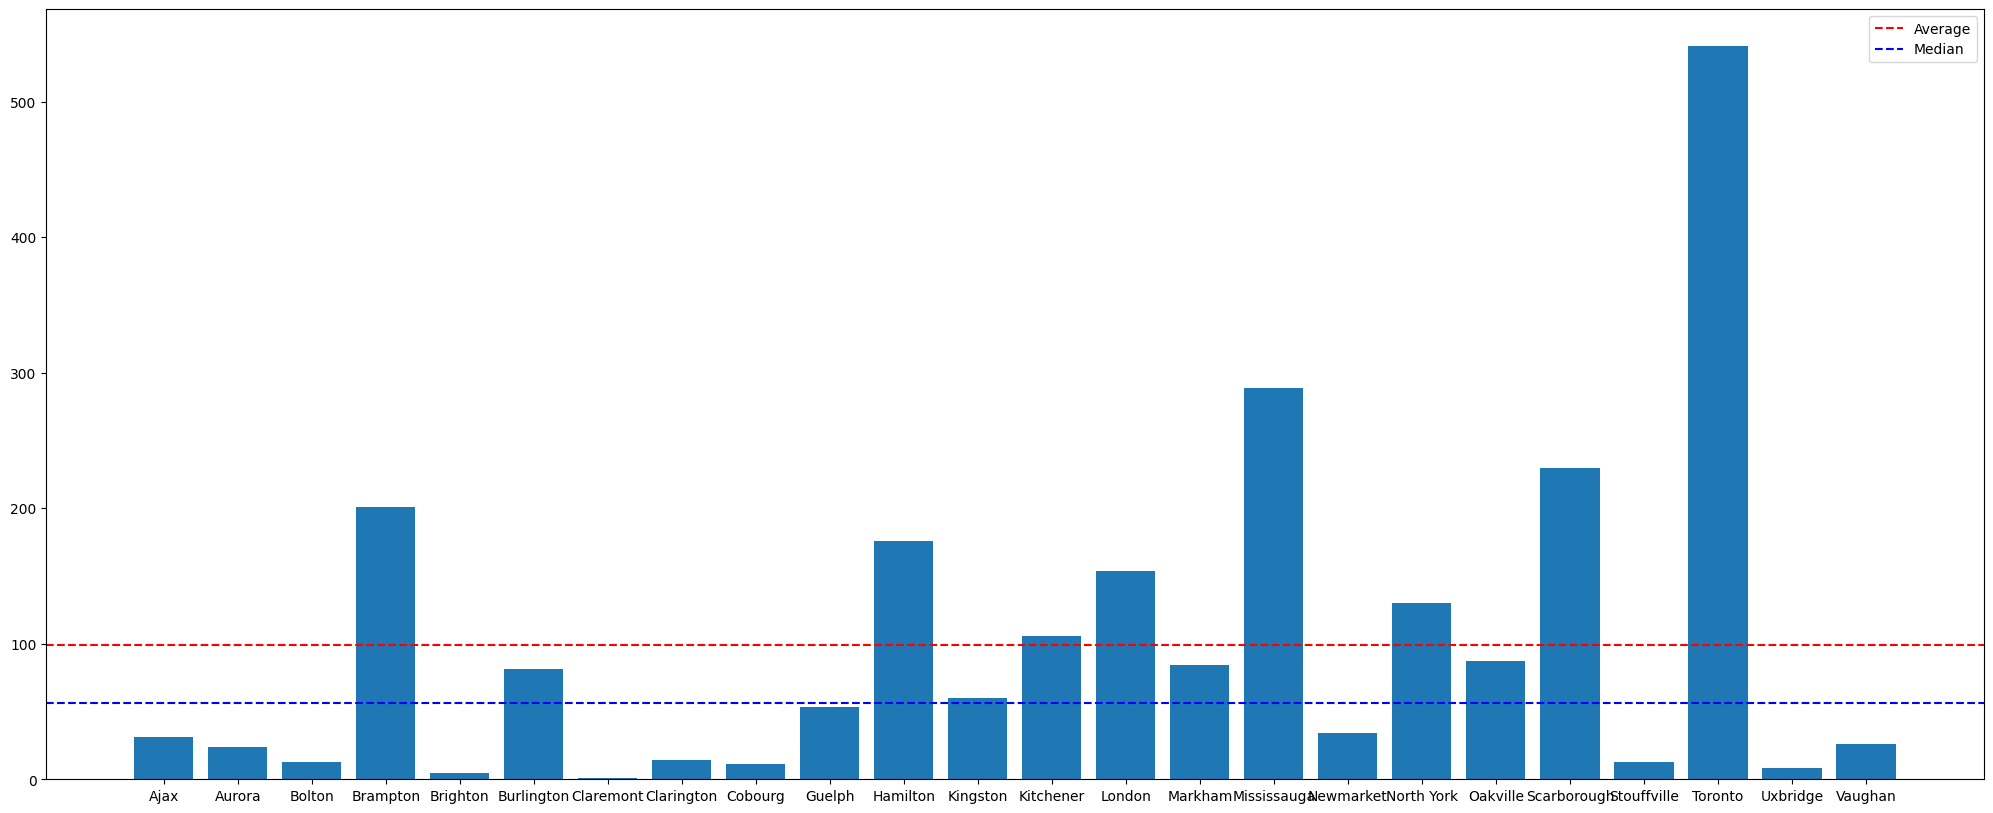

In [7]:
cities = ['Burlington', 'Bolton','Claremont', 'Clarington', 'Markham', 'Toronto', 'London', 'Kingston', 'Brampton', 'Vaughan', 'Uxbridge', 'Kitchener', 'Ajax', 'Newmarket', 'Oakville', 'Cobourg', 'Mississauga', 'Hamilton', 'Guelph', 'Scarborough', 'Brighton', 'North York', 'Aurora', 'Stouffville', "Agincourt"]

x = active_count_city[active_count_city['City'].isin(cities)]['City']
y = active_count_city[active_count_city['City'].isin(cities)]['Accreditation_Number']
avg_y = active_count_city[active_count_city['City'].isin(cities)]['Accreditation_Number'].mean()
median_y = active_count_city[active_count_city['City'].isin(cities)]['Accreditation_Number'].median()

plt.figure(figsize=(25,10))
plt.bar(x, y)
plt.axhline(avg_y, color='red', linestyle='--', label='Average')
plt.axhline(median_y, color='blue', linestyle='--', label='Median')
plt.legend()
plt.show()


We can see here which cities are already saturated in # of pharmacies with Scarborough, Mississauga and Toronto leading the pact. What is surprising is Vaughan has a very low number of pharmacies which is strange since it is part of the GTA.

In [25]:
population_df = pd.read_csv('./Fixed Census v3.csv')
for city in population_df['GEO_NAME'].unique():
    location = str(city)
    location = location.split(',')[0]
    if 'Clar' in location:
        print(location)

C:\Users\shann\AppData\Local\Temp\ipykernel_4676\3771462465.py:1: DtypeWarning: Columns (2633) have mixed types. Specify dtype option on import or set low_memory=False.
  population_df = pd.read_csv('./Fixed Census v3.csv')


Clarence-Rockland
Clarington


In [26]:
focus_df = population_df[['Population, 2021','Population, 2016', 'GEO_NAME']]
excluded_locations = ['Hamilton, Township (TP)', 'Mississaugas of Scugog Island, Indian reserve (IRI)', 'Guelph/Eramosa, Township (TP)']
focus_df = focus_df[~focus_df['GEO_NAME'].isin(excluded_locations)] 
for index, row in focus_df.iterrows():
    
    for city in cities:
        if city in str(row.GEO_NAME).split(',')[0] and city not in excluded_locations:
            focus_df.loc[index, 'GEO_NAME'] = city

In [27]:
focus_df = focus_df[focus_df['GEO_NAME'].isin(cities)]
focus_df = focus_df.rename(columns={'GEO_NAME': 'City'})

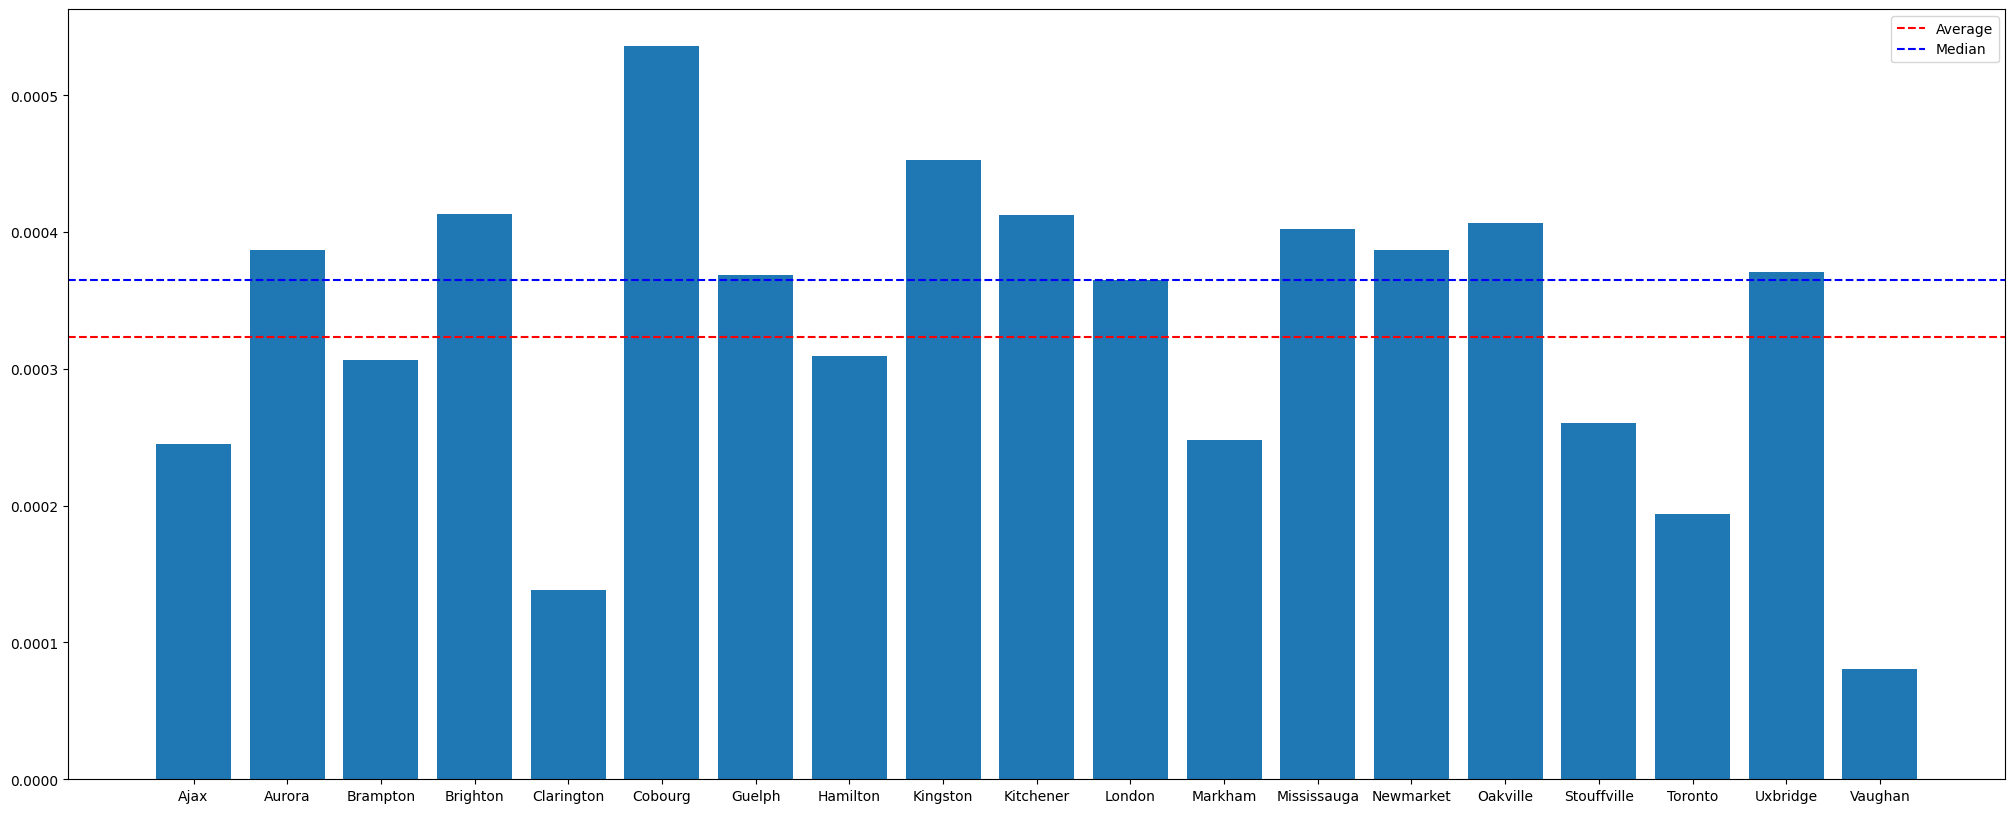

In [28]:
joined_df = pd.merge(active_count_city, focus_df, on='City', how='inner')

joined_df['Pharmacy per capita'] = joined_df['Accreditation_Number'] / joined_df['Population, 2021']

x = joined_df['City']
y = joined_df['Pharmacy per capita']
avg_y = joined_df['Pharmacy per capita'].mean()
median_y = joined_df['Pharmacy per capita'].median()

plt.figure(figsize=(25,10))
plt.bar(x, y)
plt.axhline(avg_y, color='red', linestyle='--', label='Average')
plt.axhline(median_y, color='blue', linestyle='--', label='Median')
plt.legend()
plt.show()

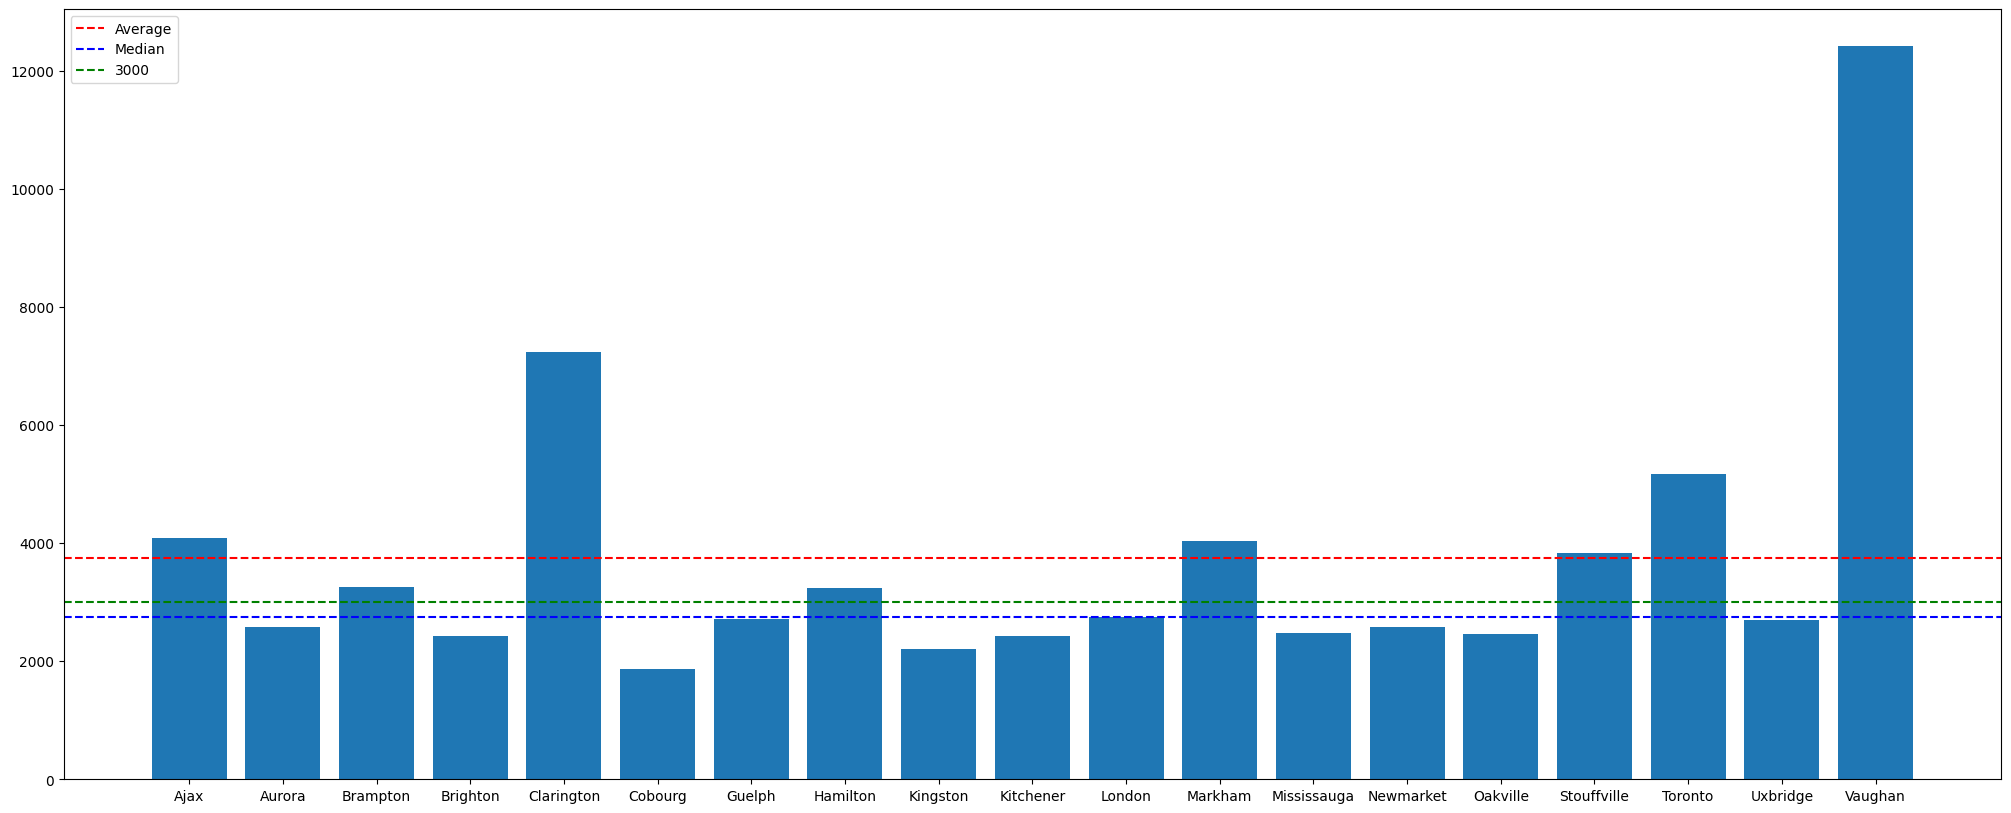

In [20]:
joined_df = pd.merge(active_count_city, focus_df, on='City', how='inner')

joined_df['3000 people per pharmacy'] = joined_df['Population, 2021'] / joined_df['Accreditation_Number'] 

x = joined_df['City']
y = joined_df['3000 people per pharmacy']
avg_y = joined_df['3000 people per pharmacy'].mean()
median_y = joined_df['3000 people per pharmacy'].median()

plt.figure(figsize=(25,10))
plt.bar(x, y)
plt.axhline(avg_y, color='red', linestyle='--', label='Average')
plt.axhline(median_y, color='blue', linestyle='--', label='Median')
plt.axhline(3000, color='green', linestyle='--', label='3000')
plt.legend()
plt.show()